In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
data_dir = r'M:\retinopathy\colored_images'


In [6]:
# Data generators with augmentation and a 20% validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


In [7]:
# Training generator
train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 2931 images belonging to 5 classes.


In [8]:
# Validation generator
val_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 731 images belonging to 5 classes.


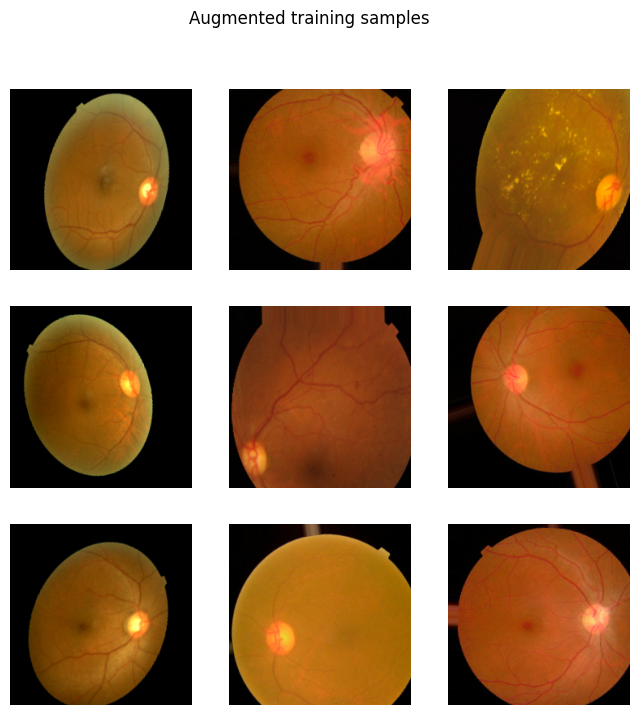

In [10]:
# Visualize some augmented samples
x_batch, _ = next(train_gen)
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle('Augmented training samples')
plt.show()

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

d:\VSCODE\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.summary()

# Train the model
epochs = 20
history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=val_gen
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

d:\VSCODE\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.5101 - loss: 1.2814 - val_accuracy: 0.7086 - val_loss: 0.8752
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.6901 - loss: 0.9196 - val_accuracy: 0.7045 - val_loss: 0.8240
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.6854 - loss: 0.8982 - val_accuracy: 0.6977 - val_loss: 0.8415
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.7303 - loss: 0.8246 - val_accuracy: 0.7100 - val_loss: 0.8025
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.7036 - loss: 0.8737 - val_accuracy: 0.7073 - val_loss: 0.8259
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 92s 995ms/step - accuracy: 0.7255 - loss: 0.7940 - val_accuracy: 0.6895 - val_loss: 0.8122
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.7079 - loss: 0.8030 - val_accuracy: 0.7155 - val_loss: 0.7941
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.7264 - loss: 0.8084 - val_accuracy: 0.6922 - val

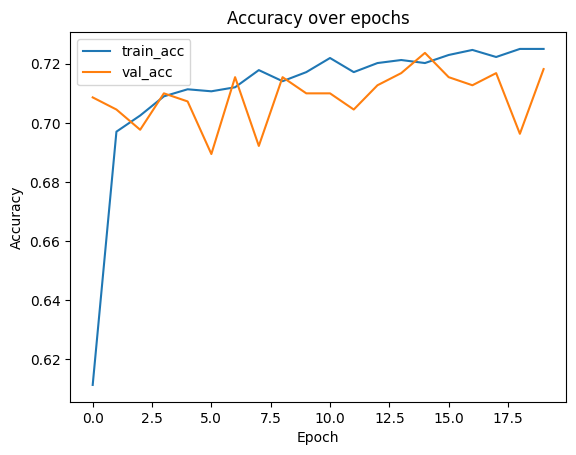

In [14]:
# Plot training history
plt.figure()
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

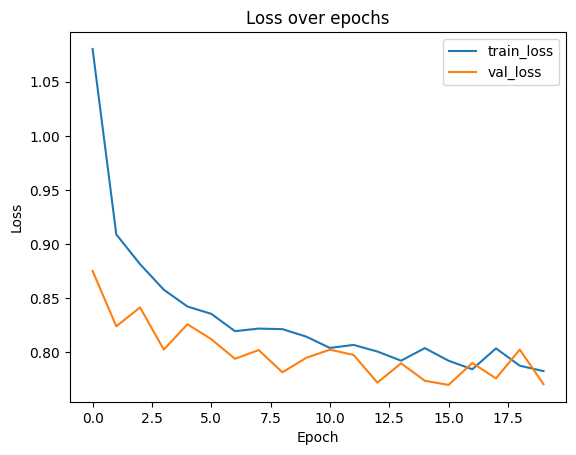

In [15]:
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
# Save the trained model in H5 format
model_save_path = 'dr_retinopathy_model.h5'
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to dr_retinopathy_model.h5
